<a href="https://colab.research.google.com/github/PCopath/titanic-ml-pipeline/blob/main/ttncnot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerekli kütüphaneleri yüklüyoruz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline



In [ ]:
# Titanic veri setini Colab'e yüklüyoruz
from google.colab import files
uploaded = files.upload()

# CSV dosyasını okuyoruz
df = pd.read_csv('titanic.csv')
df.head(200)






Saving titanic.csv to titanic (1).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q


In [ ]:
# Sütun isimlerinden baştaki ve sondaki boşlukları temizle
df.columns = df.columns.str.strip()

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Kullanılmayacak olan sütunları kaldırıyoruz
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Eksik yaş verilerini medyan ile dolduruyoruz
df['Age'] = df['Age'].fillna(df['Age'].median())

# Eksik liman (Embarked) verilerini en sık görülen değer ile dolduruyoruz
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [ ]:
# Cinsiyet verisini sayısal hale getiriyoruz: male=0, female=1
df['Gender'] = df['Sex'].map({'male': 0, 'female': 1})

# Artık kullanılmayan 'Sex' sütununu kaldırıyoruz
df.drop('Sex', axis=1, inplace=True)

# 'Embarked' sütununu one-hot encoding ile sayısal hale getiriyoruz
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
# One-hot encoding sonrası oluşan True/False sütunları 0/1'e dönüştürüyoruz
df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)

df.head(200)


,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
195,1,1,58.0,0,0,146.5208,1,1,0,0
196,0,3,28.0,0,0,7.7500,0,0,1,0
197,0,3,42.0,0,1,8.4042,0,0,0,1
198,1,3,28.0,0,0,7.7500,1,0,1,0


In [ ]:
# Aile büyüklüğünü hesaplıyoruz
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Yolcu yalnız mı değil mi onu belirliyoruz
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Çocuk mu (12 yaş ve altı)
df['Child'] = (df['Age'] <= 12).astype(int)

# Yaşlı mı (60 yaş ve üstü)
df['Senior'] = (df['Age'] >= 60).astype(int)

# Kişi başı bilet fiyatını hesaplıyoruz
df['Fare_Per_Person'] = df['Fare'] / df['FamilySize']
df['Fare_Per_Person'] = df['Fare_Per_Person'].fillna(df['Fare_Per_Person'].median())
df.head(20)


,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Child,Senior,Fare_Per_Person
0,0,3,22.0,1,0,7.2500,0,0,0,1,2,0,0,0,3.625000
1,1,1,38.0,1,0,71.2833,1,1,0,0,2,0,0,0,35.641650
2,1,3,26.0,0,0,7.9250,1,0,0,1,1,1,0,0,7.925000
3,1,1,35.0,1,0,53.1000,1,0,0,1,2,0,0,0,26.550000
4,0,3,35.0,0,0,8.0500,0,0,0,1,1,1,0,0,8.050000
5,0,3,28.0,0,0,8.4583,0,0,1,0,1,1,0,0,8.458300
6,0,1,54.0,0,0,51.8625,0,0,0,1,1,1,0,0,51.862500
7,0,3,2.0,3,1,21.0750,0,0,0,1,5,0,1,0,4.215000
8,1,3,27.0,0,2,11.1333,1,0,0,1,3,0,0,0,3.711100
9,1,2,14.0,1,0,30.0708,1,1,0,0,2,0,0,0,15.035400


In [ ]:
# Temel istatistiksel özet tablolarını görüntülüyoruz
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Child,Senior,Fare_Per_Person
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.352413,0.188552,0.086420,0.725028,1.904602,0.602694,0.077441,0.029181,19.916375
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.446751,1.613459,0.489615,0.267440,0.168407,35.841257
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.250000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.300000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,23.666667
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,512.329200


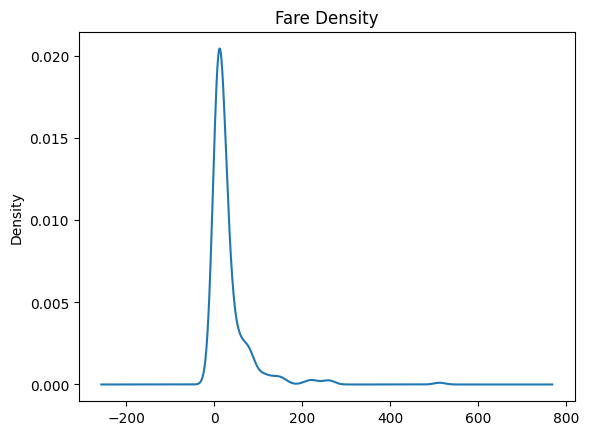

In [ ]:
# Bilet fiyatlarının yoğunluk grafiği (distribution plot)
df['Fare'].plot.density(title='Fare Density'); plt.show()

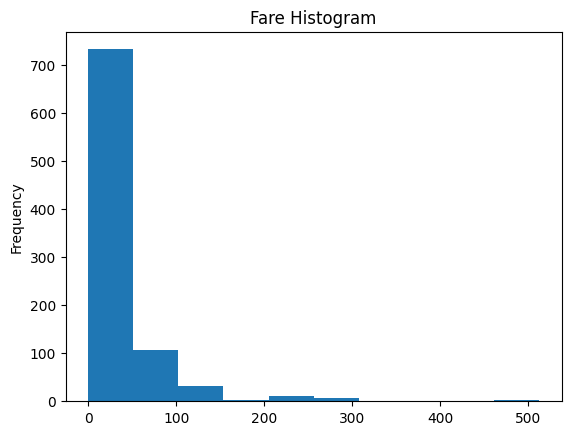

In [ ]:
# Bilet fiyatlarının histogramı
df['Fare'].plot.hist(title='Fare Histogram'); plt.show()

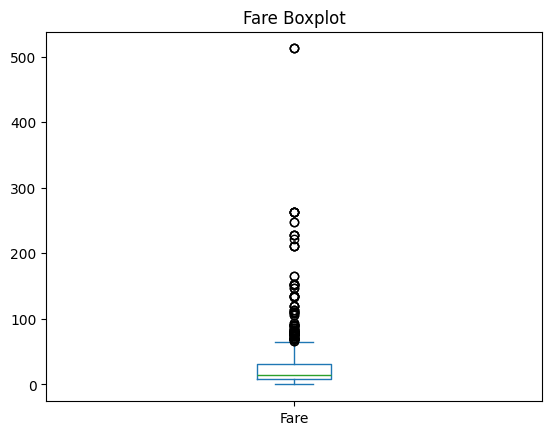

In [ ]:
# Bilet fiyatlarının kutu grafiği (outlier analizi için)
df['Fare'].plot.box(title='Fare Boxplot'); plt.show()

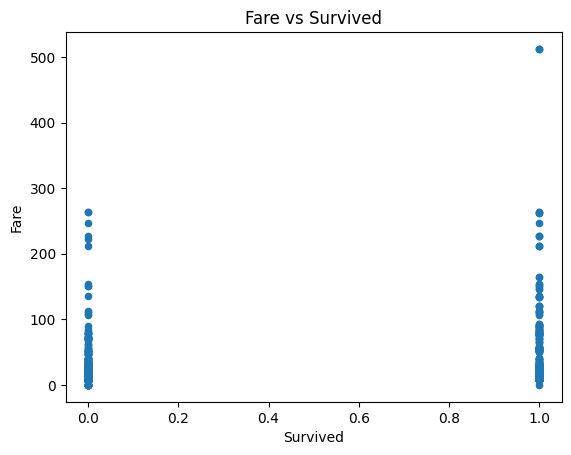

In [ ]:
# Hayatta kalma durumuna göre bilet fiyatı dağılımı
df.plot.scatter(x='Survived', y='Fare', title='Fare vs Survived'); plt.show()

,0
0,"Axes(0.1,0.15;0.363636x0.75)"
1,"Axes(0.536364,0.15;0.363636x0.75)"


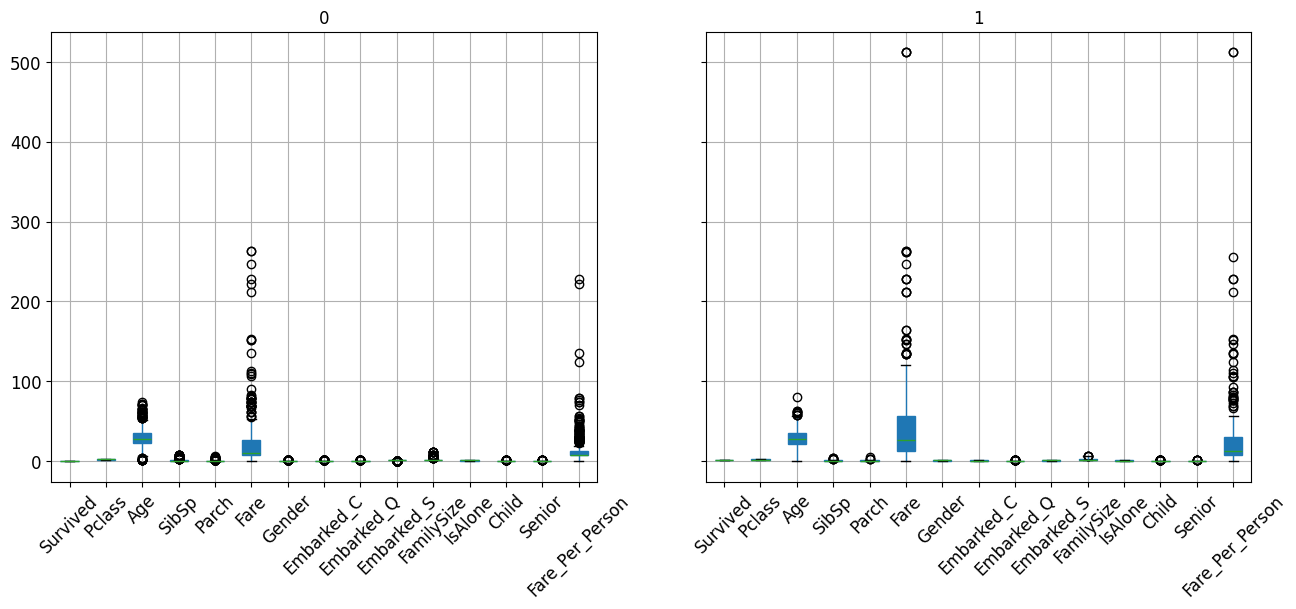

In [ ]:
# Hayatta kalma durumuna göre tüm sütunlar için kutu grafikleri
df.groupby('Survived').boxplot(fontsize=12, rot=45, figsize=(15,6), patch_artist=True)

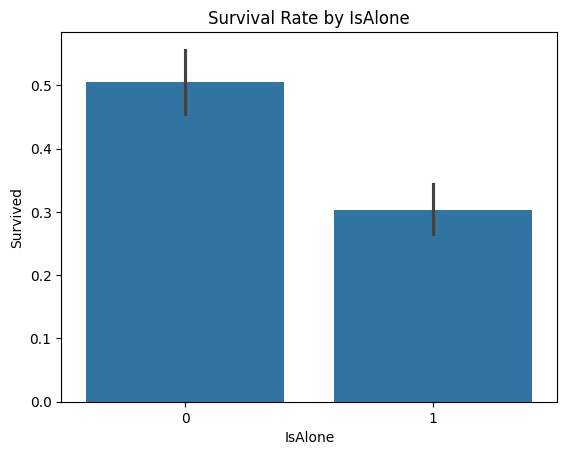

In [ ]:
# Yalnız olup olmamaya göre hayatta kalma oranı
sns.barplot(x='IsAlone', y='Survived', data=df); plt.title('Survival Rate by IsAlone'); plt.show()

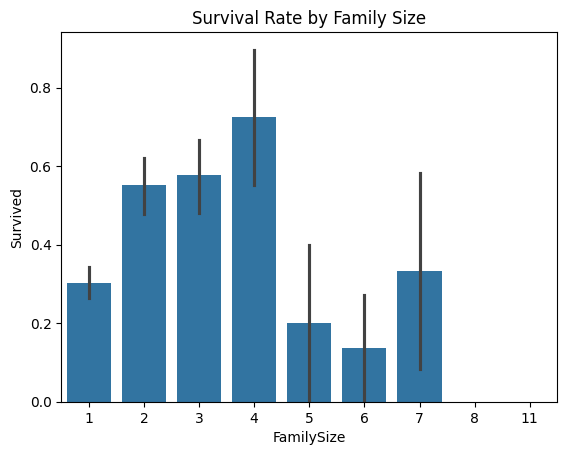

In [ ]:
# Aile büyüklüğüne göre hayatta kalma oranı
sns.barplot(x='FamilySize', y='Survived', data=df); plt.title('Survival Rate by Family Size'); plt.show()

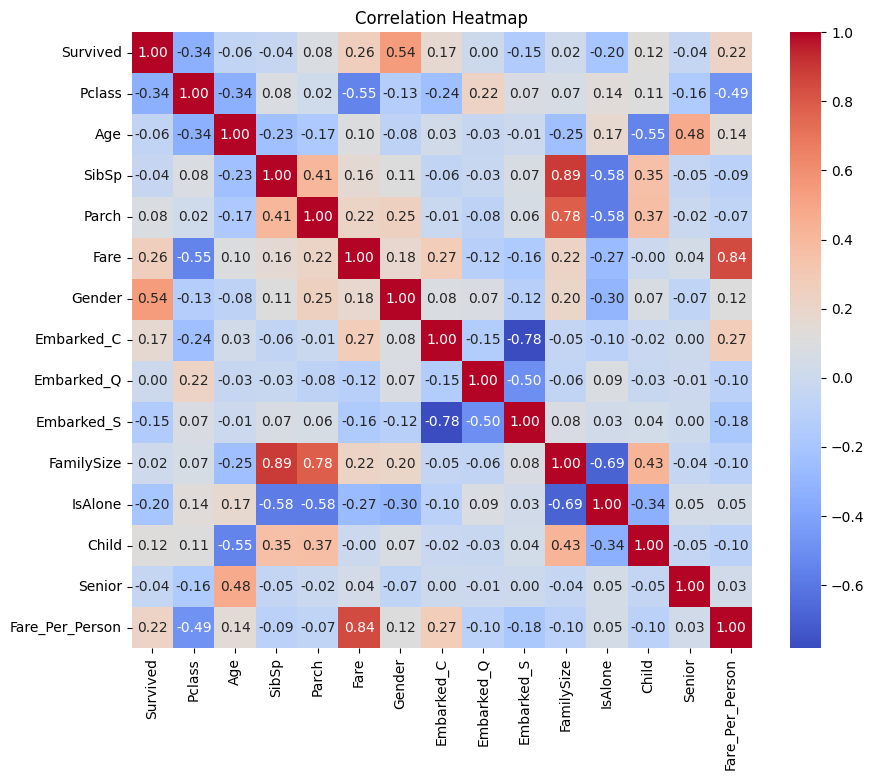

In [ ]:
# Korelasyon ısı haritası ile değişken ilişkileri
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

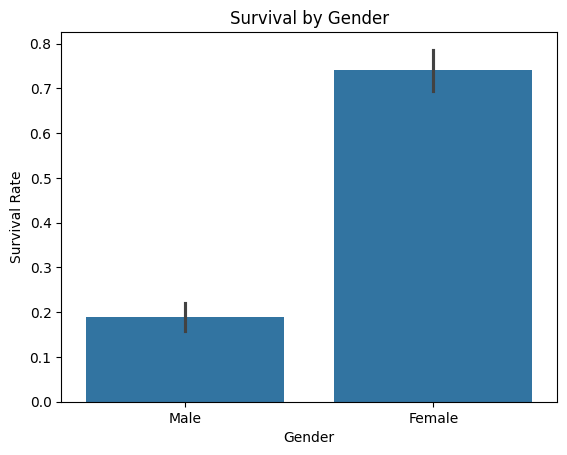

In [ ]:
# Cinsiyete göre hayatta kalma oranı
sns.barplot(x='Gender', y='Survived', data=df)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

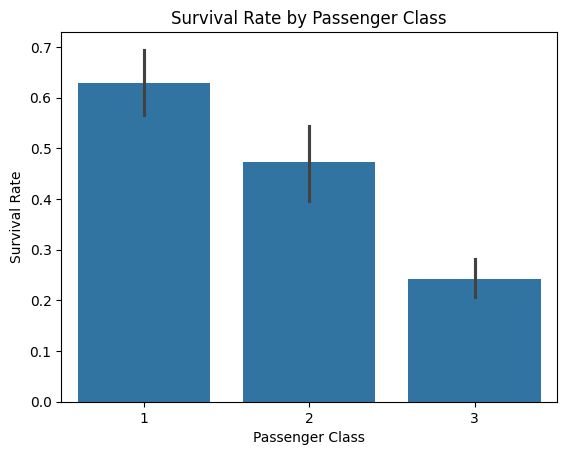

In [ ]:
# Yolcu sınıfına göre hayatta kalma oranı
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

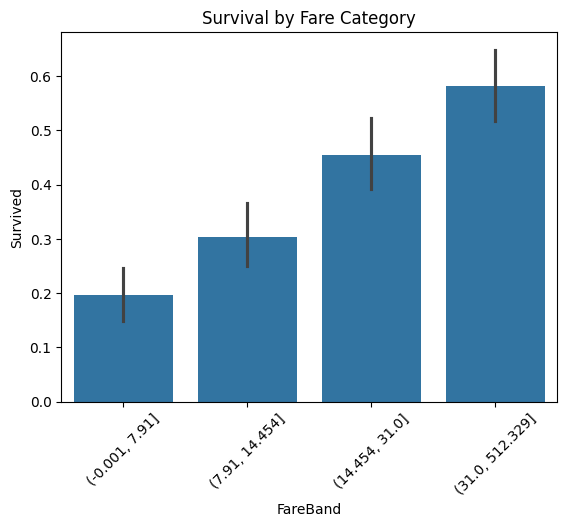

In [ ]:
# Fiyatı kategorilere ayırıp hayatta kalma oranı
import pandas as pd
df['FareBand'] = pd.qcut(df['Fare'], 4)
sns.barplot(x='FareBand', y='Survived', data=df)
plt.title('Survival by Fare Category')
plt.xticks(rotation=45)
plt.show()

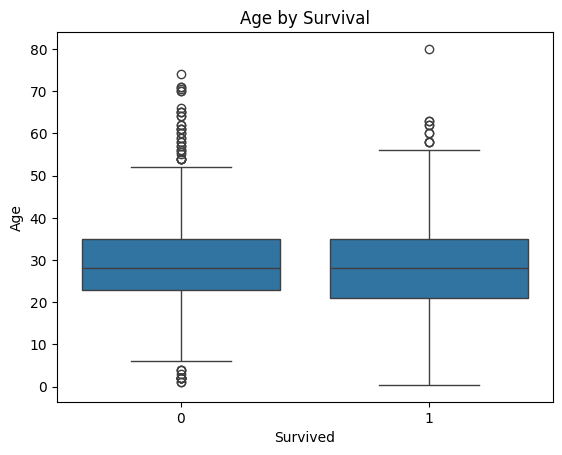

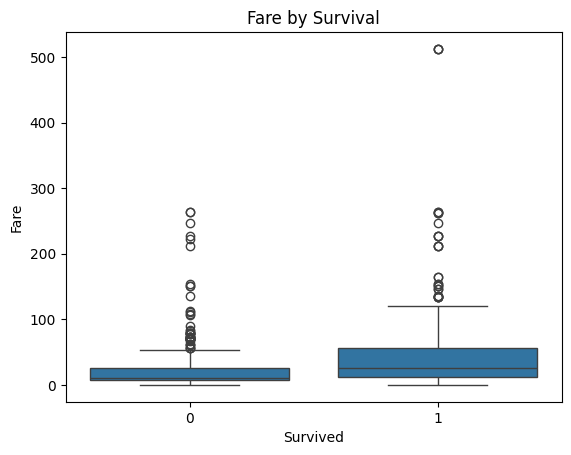

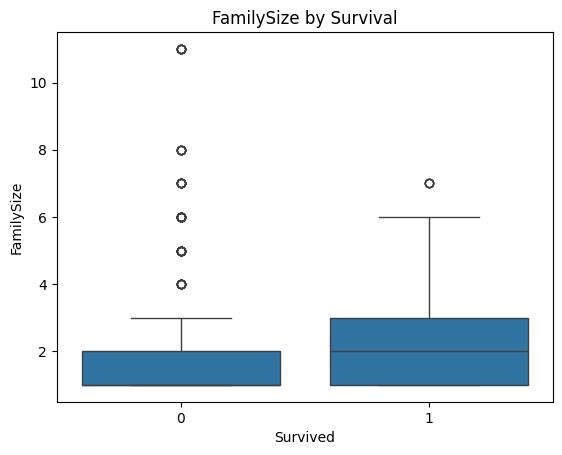

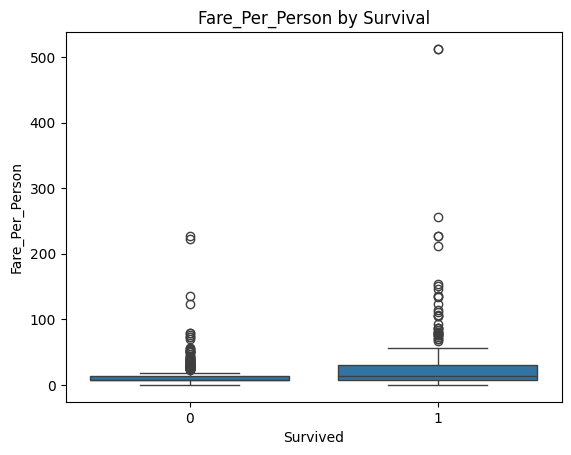

In [ ]:
# Hayatta kalanlar için önemli sütunların kutu grafikleri
features = ['Age', 'Fare', 'FamilySize', 'Fare_Per_Person']
for col in features:
    sns.boxplot(x='Survived', y=col, data=df)
    plt.title(f'{col} by Survival')
    plt.show()

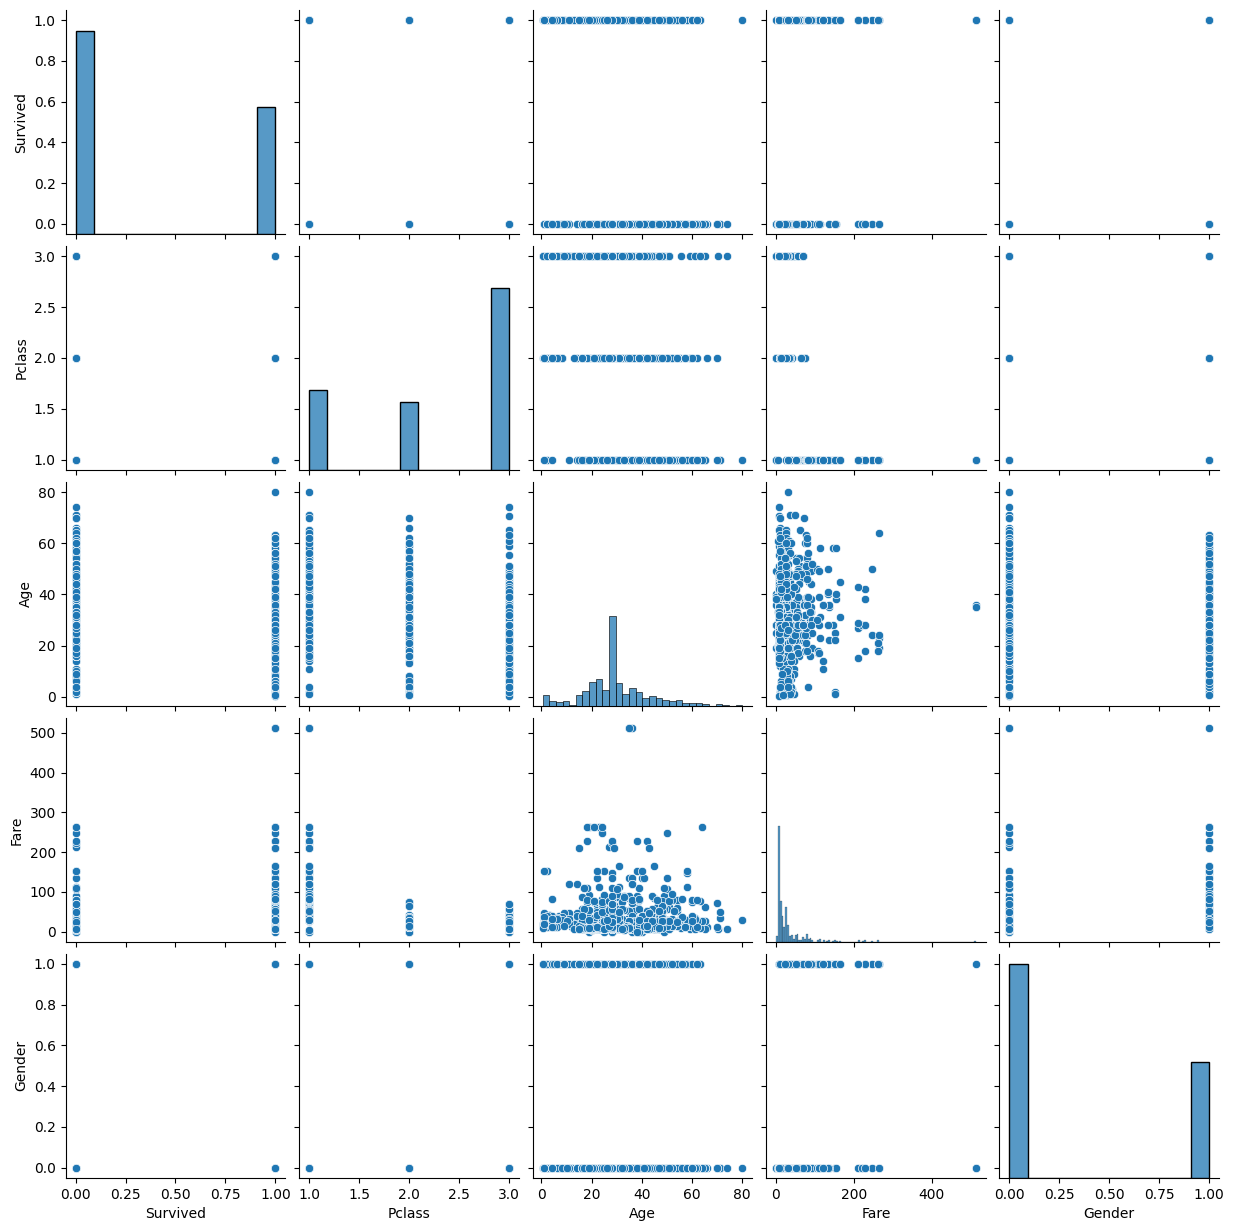

In [ ]:
# Önemli değişkenler arasındaki ilişkiyi gösteren pairplot
df_subset = df[['Survived', 'Pclass', 'Age', 'Fare', 'Gender']]
sns.pairplot(df_subset)
plt.show()

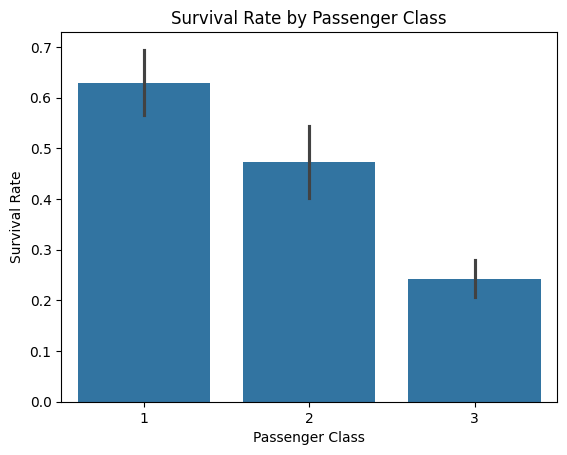

In [ ]:
# Yolcu sınıfına göre hayatta kalma oranı
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

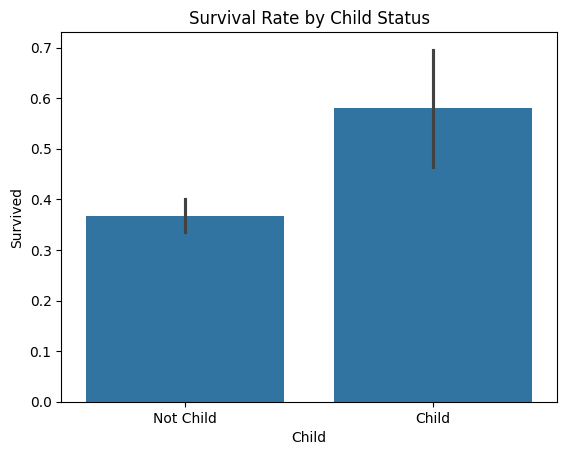

In [ ]:
# Çocuk olup olmamaya göre hayatta kalma oranı
sns.barplot(x='Child', y='Survived', data=df)
plt.xticks([0,1], ['Not Child', 'Child'])
plt.title('Survival Rate by Child Status')
plt.show()


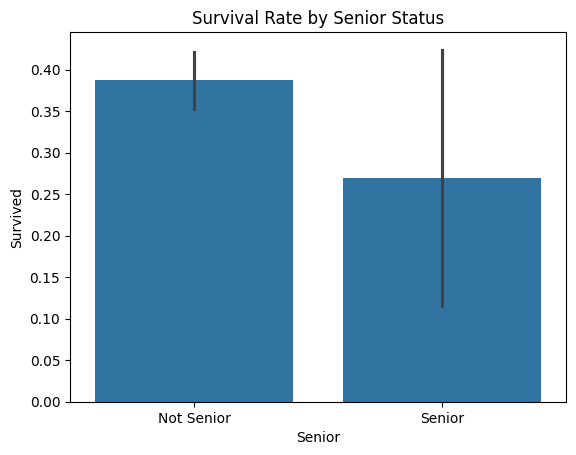

In [ ]:
# Yaşlı olup olmamaya göre hayatta kalma oranı
sns.barplot(x='Senior', y='Survived', data=df)
plt.xticks([0,1], ['Not Senior', 'Senior'])
plt.title('Survival Rate by Senior Status')
plt.show()


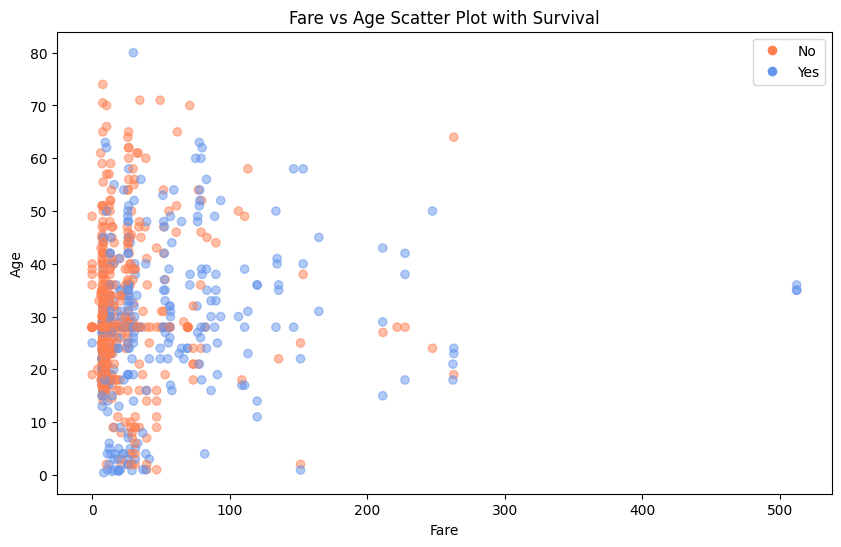

In [ ]:
# Hayatta kalma durumuna göre yaş ve ücret scatter plot
plt.figure(figsize=(10,6))
colors = df['Survived'].map({0: 'coral', 1: 'cornflowerblue'})
plt.scatter(df['Fare'], df['Age'], alpha=0.5, c=colors)
plt.title("Fare vs Age Scatter Plot with Survival")
plt.xlabel("Fare")
plt.ylabel("Age")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='No', markerfacecolor='coral', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Yes', markerfacecolor='cornflowerblue', markersize=8)
])
plt.show()


In [ ]:
# Interval tipi sütunları (örneğin FareBand) kaldır
X = df.drop(["Survived", "FareBand"], axis=1, errors="ignore")
y = df["Survived"]

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluştur ve eğit
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Tahmin yap
y_pred = lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)[:, 1]  # ROC AUC için olasılık tahmini

# Metrikleri hesapla
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))




Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297
F1 Score: 0.7552447552447552
ROC AUC: 0.8806949806949808


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modeli oluştur ve eğit
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Tahmin yap
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Metrikleri hesapla
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_prob_rf))


Random Forest Accuracy: 0.8268156424581006
Random Forest Precision: 0.7792207792207793
Random Forest Recall: 0.8108108108108109
Random Forest F1 Score: 0.7947019867549668
Random Forest ROC AUC: 0.8935006435006435


In [ ]:
from xgboost import XGBClassifier

# Modeli oluştur ve eğit
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:04:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Tahmin yap
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Metrikleri hesapla
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Precision:", precision_score(y_test, y_pred_xgb))
print("XGBoost Recall:", recall_score(y_test, y_pred_xgb))
print("XGBoost F1 Score:", f1_score(y_test, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(y_test, y_prob_xgb))


XGBoost Accuracy: 0.8100558659217877
XGBoost Precision: 0.7777777777777778
XGBoost Recall: 0.7567567567567568
XGBoost F1 Score: 0.7671232876712328
XGBoost ROC AUC: 0.8770913770913772


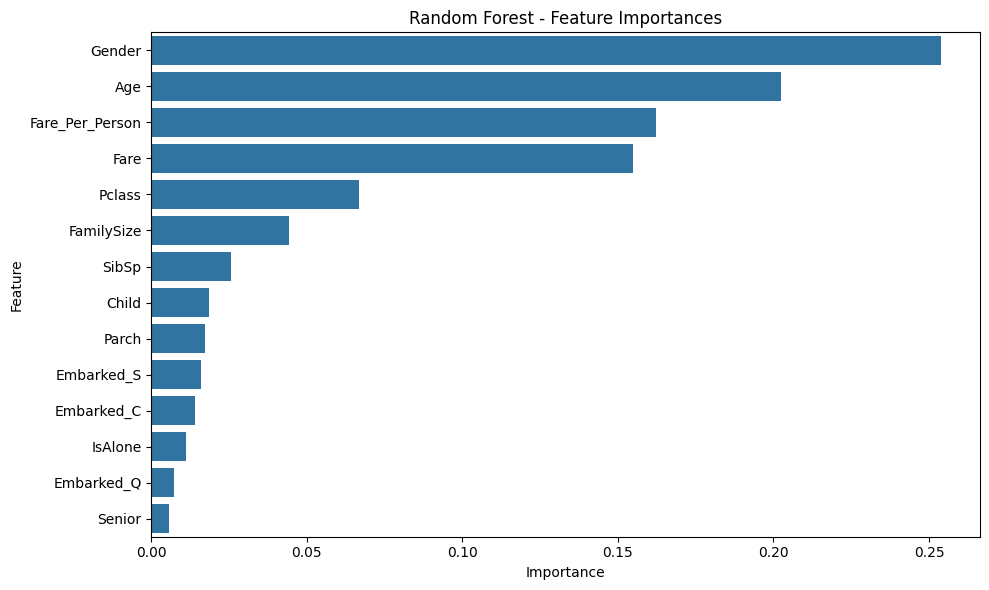

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Özellik önemini al
importances = rf_model.feature_importances_
feature_names = X_train.columns

# DataFrame oluştur
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Görselleştir
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Random Forest - Feature Importances')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parametreler için grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch tanımı
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# GridSearch başlat
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
print("En iyi parametreler:")
print(grid_search.best_params_)

print("\nEn iyi eğitim skoru (cross-validated):")
print(grid_search.best_score_)


En iyi parametreler:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

En iyi eğitim skoru (cross-validated):
0.8272234807446075


In [ ]:
# En iyi parametrelerle model oluştur
tuned_rf = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
)

# Eğitim
tuned_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [ ]:
# Tahmin ve metrikler
y_pred_tuned = tuned_rf.predict(X_test)
y_prob_tuned = tuned_rf.predict_proba(X_test)[:, 1]

print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned RF Precision:", precision_score(y_test, y_pred_tuned))
print("Tuned RF Recall:", recall_score(y_test, y_pred_tuned))
print("Tuned RF F1 Score:", f1_score(y_test, y_pred_tuned))
print("Tuned RF ROC AUC:", roc_auc_score(y_test, y_prob_tuned))


Tuned RF Accuracy: 0.8324022346368715
Tuned RF Precision: 0.8666666666666667
Tuned RF Recall: 0.7027027027027027
Tuned RF F1 Score: 0.7761194029850746
Tuned RF ROC AUC: 0.8934362934362935


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Parametre aralığı tanımı
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # çünkü l1 için sadece bazı solverlar destekleniyor
}

# GridSearch tanımı
grid_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Modeli ara
grid_lr.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
print("Logistic Regression için en iyi parametreler:")
print(grid_lr.best_params_)

print("\nCross-validation doğruluk skoru:")
print(grid_lr.best_score_)


Logistic Regression için en iyi parametreler:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Cross-validation doğruluk skoru:
0.7977051117896188


In [ ]:
# En iyi modelle tahmin yap
tuned_lr = grid_lr.best_estimator_

y_pred_lr_tuned = tuned_lr.predict(X_test)
y_prob_lr_tuned = tuned_lr.predict_proba(X_test)[:, 1]

# Metrikleri hesapla
print("Tuned LR Accuracy:", accuracy_score(y_test, y_pred_lr_tuned))
print("Tuned LR Precision:", precision_score(y_test, y_pred_lr_tuned))
print("Tuned LR Recall:", recall_score(y_test, y_pred_lr_tuned))
print("Tuned LR F1 Score:", f1_score(y_test, y_pred_lr_tuned))
print("Tuned LR ROC AUC:", roc_auc_score(y_test, y_prob_lr_tuned))


Tuned LR Accuracy: 0.7988826815642458
Tuned LR Precision: 0.7714285714285715
Tuned LR Recall: 0.7297297297297297
Tuned LR F1 Score: 0.75
Tuned LR ROC AUC: 0.8718146718146719


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Parametre grid'i (daha küçük tutuyoruz)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# GridSearch tanımı
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Modeli eğit
grid_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:43:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
print("XGBoost için en iyi parametreler:")
print(grid_xgb.best_params_)

print("\nCross-validation doğruluk skoru:")
print(grid_xgb.best_score_)


XGBoost için en iyi parametreler:
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

Cross-validation doğruluk skoru:
0.8244065793361568


In [ ]:
# En iyi modelle tahmin yap
tuned_xgb = grid_xgb.best_estimator_

y_pred_xgb_tuned = tuned_xgb.predict(X_test)
y_prob_xgb_tuned = tuned_xgb.predict_proba(X_test)[:, 1]

# Metrikleri hesapla
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print("Tuned XGBoost Precision:", precision_score(y_test, y_pred_xgb_tuned))
print("Tuned XGBoost Recall:", recall_score(y_test, y_pred_xgb_tuned))
print("Tuned XGBoost F1 Score:", f1_score(y_test, y_pred_xgb_tuned))
print("Tuned XGBoost ROC AUC:", roc_auc_score(y_test, y_prob_xgb_tuned))


Tuned XGBoost Accuracy: 0.8044692737430168
Tuned XGBoost Precision: 0.8305084745762712
Tuned XGBoost Recall: 0.6621621621621622
Tuned XGBoost F1 Score: 0.7368421052631579
Tuned XGBoost ROC AUC: 0.8821106821106821


In [ ]:
conclusion_text = """
SONUÇ:
Bu projede Titanic veri seti üzerinde üç farklı sınıflandırma modeli (Logistic Regression, Random Forest, XGBoost) eğitilmiş ve karşılaştırılmıştır. Modeller hem varsayılan hem de GridSearchCV ile optimize edilmiş hiperparametrelerle değerlendirilmiştir.

Tuned Random Forest modeli %83.2 doğruluk oranıyla en iyi genel performansı göstermiştir. Tuned XGBoost ise %83.1 precision skoru ile özellikle pozitif sınıfın güvenilir tahmini açısından öne çıkmıştır. ROC AUC skorlarının tüm modellerde yüksek çıkması (87% üzeri), problemdeki sınıfların iyi ayrıştığını göstermektedir.

GELECEK ADIMLAR:
- Daha fazla model denenebilir (LightGBM, SVM, Neural Network).
- Veri zenginleştirme yapılabilir (örneğin: kabin konumundan coğrafi bilgi çıkarmak).
- Ensemble yöntemleri (Stacking, Voting Classifier) uygulanarak performans artırılabilir.
- Modelin gerçek dünya senaryolarında uygulanabilirliği test edilebilir (örneğin: ağırlıklı sınıflandırma, sınıf dengesizliği).

"""
print(conclusion_text)



SONUÇ:
Bu projede Titanic veri seti üzerinde üç farklı sınıflandırma modeli (Logistic Regression, Random Forest, XGBoost) eğitilmiş ve karşılaştırılmıştır. Modeller hem varsayılan hem de GridSearchCV ile optimize edilmiş hiperparametrelerle değerlendirilmiştir.

Tuned Random Forest modeli %83.2 doğruluk oranıyla en iyi genel performansı göstermiştir. Tuned XGBoost ise %83.1 precision skoru ile özellikle pozitif sınıfın güvenilir tahmini açısından öne çıkmıştır. ROC AUC skorlarının tüm modellerde yüksek çıkması (87% üzeri), problemdeki sınıfların iyi ayrıştığını göstermektedir.

GELECEK ADIMLAR:
- Daha fazla model denenebilir (LightGBM, SVM, Neural Network).
- Veri zenginleştirme yapılabilir (örneğin: kabin konumundan coğrafi bilgi çıkarmak).
- Ensemble yöntemleri (Stacking, Voting Classifier) uygulanarak performans artırılabilir.
- Modelin gerçek dünya senaryolarında uygulanabilirliği test edilebilir (örneğin: ağırlıklı sınıflandırma, sınıf dengesizliği).




In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test (5).csv


In [ ]:
print(test_df.columns)


Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone',
       'Fare_Per_Person', 'Child', 'Senior'],
      dtype='object')


In [ ]:
import pandas as pd

# test.csv'yi yükle
test_df = pd.read_csv("test.csv")

# 1. 'Sex' → 'Gender'
test_df['Gender'] = test_df['Sex'].map({'male': 1, 'female': 0})

# 2. Eksik değerleri doldur
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# 3. Embarked → fillna + get_dummies
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
embarked_dummies = pd.get_dummies(test_df['Embarked'], prefix='Embarked')
test_df = pd.concat([test_df, embarked_dummies], axis=1)

# 4. Ek özellikler
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)
test_df['Fare_Per_Person'] = test_df['Fare'] / test_df['FamilySize']
test_df['Child'] = (test_df['Age'] < 12).astype(int)
test_df['Senior'] = (test_df['Age'] >= 60).astype(int)

# 5. Kullanılmayan ama modelde olmayanları kaldır
drop_cols = ['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked']
test_df.drop(columns=drop_cols, inplace=True, errors='ignore')

# 6. Model giriş seti
X_final_test = test_df.drop('PassengerId', axis=1)


In [ ]:
# Eğitim setindeki sütun sırasını test setine uygula
X_final_test = X_final_test[X_train.columns]


In [ ]:
# Tahminleri al
final_predictions = tuned_rf.predict(X_final_test)


In [ ]:
# PassengerId + Tahminleri birleştir
submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': final_predictions
})

# CSV olarak kaydet
submission_df.to_csv("submission.csv", index=False)

# Colab'den bilgisayara indir
from google.colab import files
files.download("submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Modeli .pkl olarak kaydet
joblib.dump(tuned_rf, "tuned_random_forest_model.pkl")


['tuned_random_forest_model.pkl']

In [ ]:
from google.colab import files

# İndirme işlemi
files.download("tuned_random_forest_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>